In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

Upload the dataset and EDA

In [2]:
df = df = pd.read_csv('final_scout_not_dummy.csv')

In [3]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [4]:
df.shape

(15915, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [8]:
new_list=["age", "hp_kW", "km", "Gearing_Type", 'make_model', 'price']

In [9]:
# Assigning the selected features to df
df = df[new_list]

In [10]:
df["Gearing_Type"].value_counts()

Gearing_Type
Manual            8149
Automatic         7297
Semi-automatic     469
Name: count, dtype: int64

In [11]:
df["make_model"].value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [12]:
df.corr(numeric_only=True)

,age,hp_kW,km,price
age,1.000000,-0.083254,0.758306,-0.473478
hp_kW,-0.083254,1.000000,0.004217,0.696411
km,0.758306,0.004217,1.000000,-0.399291
price,-0.473478,0.696411,-0.399291,1.000000


<Axes: >

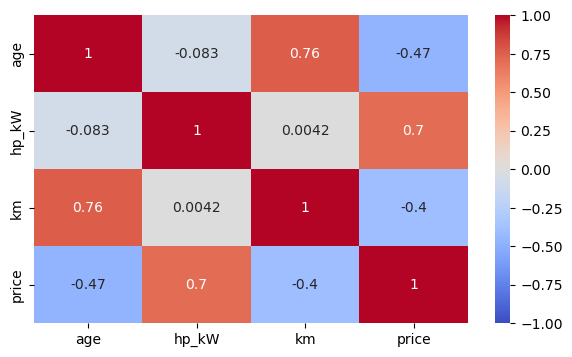

In [13]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm")

<Axes: xlabel='age', ylabel='price'>

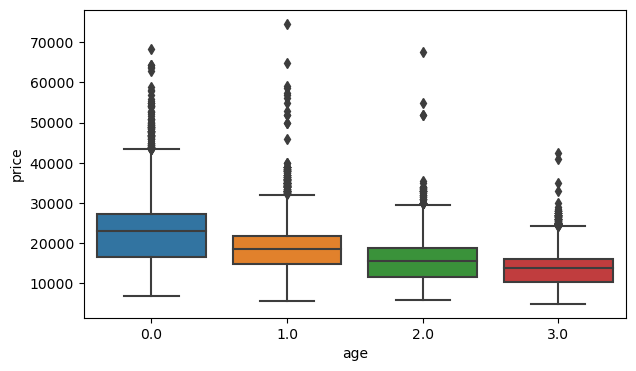

In [14]:
sns.boxplot(x = "age", y="price", data=df)

In [15]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [17]:
enc.fit(X)

OrdinalEncoder()

In [18]:
X.head()

,age,hp_kW,km,Gearing_Type,make_model
0,3.0,66.0,56013.0,Automatic,Audi A1
1,2.0,141.0,80000.0,Automatic,Audi A1
2,3.0,85.0,83450.0,Automatic,Audi A1
3,3.0,66.0,73000.0,Automatic,Audi A1
4,3.0,66.0,16200.0,Automatic,Audi A1


In [19]:
ordinal = X[["Gearing_Type","make_model"]] = enc.fit_transform(X[["Gearing_Type","make_model"]])
ordinal

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 8.],
       [0., 8.],
       [0., 8.]])

In [20]:
X["Gearing_Type"].value_counts()

Gearing_Type
1.0    8149
0.0    7297
2.0     469
Name: count, dtype: int64

In [21]:
X["make_model"].value_counts()

make_model
2.0    3097
0.0    2614
5.0    2598
3.0    2525
4.0    2216
6.0    1839
8.0     991
7.0      34
1.0       1
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Displaying the shapes of the resulting sets
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (12732, 5) (12732,)
Test set: (3183, 5) (3183,)


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

random_search = RandomizedSearchCV(RandomForestRegressor(), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 300,
                                 min_samples_split = 5,
                                 min_samples_leaf = 1,
                                 max_depth = 20,
                                 random_state=101)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=300,
                      random_state=101)

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def evaluate(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae": mean_absolute_error(y_train, y_train_pred),
    "mse": mean_squared_error(y_train, y_train_pred, squared=True),                          
    "rmse": mean_squared_error(y_train, y_train_pred, squared=False),
   },
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred),
    "mse": mean_squared_error(y_test, y_pred, squared=True),
    "rmse": mean_squared_error(y_test, y_pred, squared=False),
    }}
    
    return scores

In [32]:
evaluate(rf_model, X_train, y_train, X_test, y_test)

{'train': {'R2': 0.9668717906392312,
  'mae': 746.5299844240576,
  'mse': 1809147.672117054,
  'rmse': 1345.0456022444198},
 'test': {'R2': 0.9291449068207015,
  'mae': 1147.7261935938718,
  'mse': 3823877.9452471714,
  'rmse': 1955.4738416166992}}

In [33]:
import pickle

In [34]:
pickle.dump(rf_model, open("rf_model1","wb"))
pickle.dump(enc, open("transformer1","wb"))